In [5]:
import os
import sys
import random
import numpy as np
import optuna
import joblib
from importlib import reload  # Import the reload function
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import utils.helpers as hp
import utils.preprocess as pp
import utils.modeling as md  
import utils.tuning as tn
import utils.evaluation as ev

reload(hp)
reload(pp)
reload(md)
reload(tn)
reload(ev)
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
df = hp.fetch_data('ETHUSDT', '3m', '2021-07-17', '2024-12-31')
hp.save_data(df, '../data/ETHUSDT_3m_v600k.csv')

Fetched data from 2021-07-17 00:00:00 to 2021-07-18 00:57:00
Fetched data from 2021-07-18 01:00:00 to 2021-07-19 01:57:00
Fetched data from 2021-07-19 02:00:00 to 2021-07-20 02:57:00
Fetched data from 2021-07-20 03:00:00 to 2021-07-21 03:57:00
Fetched data from 2021-07-21 04:00:00 to 2021-07-22 04:57:00
Fetched data from 2021-07-22 05:00:00 to 2021-07-23 05:57:00
Fetched data from 2021-07-23 06:00:00 to 2021-07-24 06:57:00
Fetched data from 2021-07-24 07:00:00 to 2021-07-25 07:57:00
Fetched data from 2021-07-25 08:00:00 to 2021-07-26 08:57:00
Fetched data from 2021-07-26 09:00:00 to 2021-07-27 09:57:00
Fetched data from 2021-07-27 10:00:00 to 2021-07-28 10:57:00
Fetched data from 2021-07-28 11:00:00 to 2021-07-29 11:57:00
Fetched data from 2021-07-29 12:00:00 to 2021-07-30 12:57:00
Fetched data from 2021-07-30 13:00:00 to 2021-07-31 13:57:00
Fetched data from 2021-07-31 14:00:00 to 2021-08-01 14:57:00
Fetched data from 2021-08-01 15:00:00 to 2021-08-02 15:57:00
Fetched data from 2021-0

In [41]:
timeframe_filenames = {
    "1m": "../data/raw/ETHUSDT_1m_v600k.csv",
    "3m": "../data/raw/ETHUSDT_3m_v600k.csv",
    "5m": "../data/DOGEUSDT_5m_v0.csv",
    "15m": "../data/DOGEUSDT_15m_v0.csv",
    "30m": "../data/DOGEUSDT_30m_v0.csv"
}

In [ ]:


params = {'lstm_units_1': 64, 'lstm_units_2': 64, 'dropout': 0.5, 'learning_rate': 0.002925417243613031, 'batch_size': 32, 'dense_units': 32, 'sequence_length': 10, 'gradient_clipping': 2.0, 'optimizer': 'adam', 'activation': 'tanh', 'num_indicators': 39, 'scaler_type': 'MinMaxScaler'
,'timeframe': '1m', 'window_size': 80, 'look_ahead_size': 20}

model_df, test_df = md.load_model_test_split(timeframe_filenames, params)
model = md.custom_model(model_df, params, model_name='ethusdt_1m_v600k_v0')

Dataset loaded from ../data/raw/ETHUSDT_1m_v600k.csv.
Scaler dumped


I0000 00:00:1736301433.155098    6713 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5007 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:02:00.0, compute capability: 6.1
I0000 00:00:1736301436.909605    6923 cuda_dnn.cc:529] Loaded cuDNN version 90300


110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0699 - mae: 0.1797 - val_loss: 0.0032 - val_mae: 0.0382
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0066 - mae: 0.0604 - val_loss: 0.0028 - val_mae: 0.0352
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049 - mae: 0.0500 - val_loss: 0.0022 - val_mae: 0.0317
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mae: 0.0457 - val_loss: 0.0026 - val_mae: 0.0349
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - mae: 0.0449 - val_loss: 0.0023 - val_mae: 0.0303
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mae: 0.0425 - val_loss: 0.0019 - val_mae: 0.0301
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - mae: 0.0421 - val_loss: 0.0022 - val_mae: 0.0327
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mae: 0.0423 - val_loss: 0.0038 - val_mae: 0.0417
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mae: 0.0435 - val_loss: 0.0035 - val_mae: 0.0375
110/110 ━━━━━━━━━━━━━━━━━━━━

In [4]:
hp.save_model(model, params, model_name='ethusdt_1m_v600k_v0')

Model saved to ../models/ethusdt_1m_v600k_v0


In [5]:
X_test, y_test, y_real = md.test_data(test_df, params, model_name='ethusdt_1m_v600k_v0')

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {test_loss}, Test MAE: {test_mae}')

Test data dumped
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mae: 0.0904
Test loss: 0.02342669479548931, Test MAE: 0.10077104717493057


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
rmse_combined: 0.003022398329444876


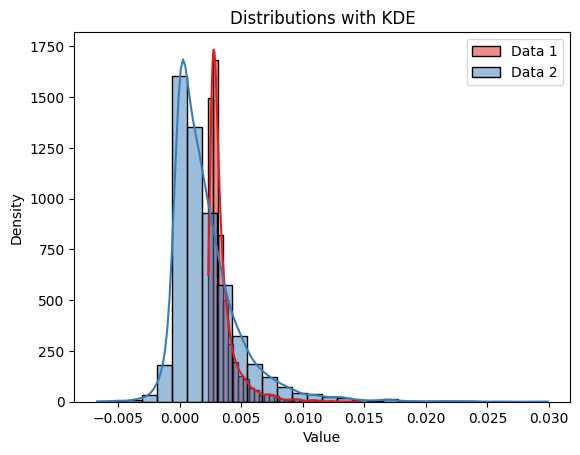

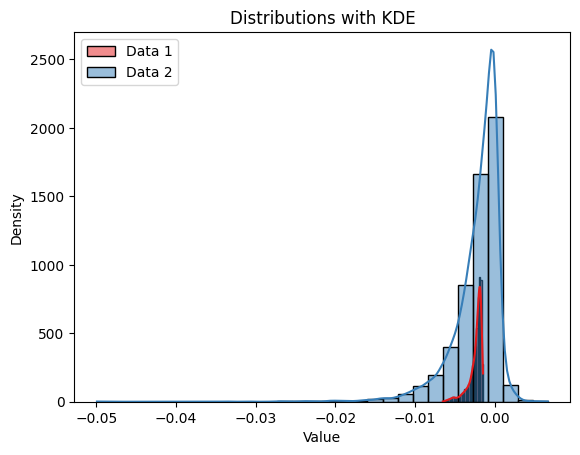

In [ ]:

y_pred = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)

rmse_max = np.sqrt(mean_squared_error(y_real[:,0], y_pred[:,0]))
rmse_min = np.sqrt(mean_squared_error(y_real[:,1], y_pred[:,1]))
rmse_combined = (rmse_min + rmse_max) / 2

print(f'rmse_combined: {rmse_combined}')

hp.distribution_plot(y_pred[:,0], y_real[:,0],)
hp.distribution_plot(y_pred[:,1], y_real[:,1],)


In [1]:
ev.calculate_percentage_above_threshold(y_real, .01)

NameError: name 'ev' is not defined

In [11]:
ev.profit_simulation(y_pred, y_real, 0.005)

np.float64(-0.06942606995989754)